In [32]:
cd /projects/foldtree2

[Errno 2] No such file or directory: '/projects/foldtree2'
/home/dmoi/projects/foldtree2


In [33]:
from Bio.PDB import PDBParser
import numpy as np
from scipy.spatial.distance import cdist

# Load structure (replace 'your_structure.pdb' with your PDB file)
parser = PDBParser(QUIET=True)
structure = parser.get_structure('protein', './config/1eei.pdb')

# Extract alpha carbon coordinates
ca_coords = []
for model in structure:
	for chain in model:
		for residue in chain:
			if 'CA' in residue:
				ca_coords.append(residue['CA'].get_coord())
ca_coords = np.array(ca_coords)

# Compute distance matrix
dist_matrix = cdist(ca_coords, ca_coords)

# FFT of each row
fft_matrix = np.fft.fft(dist_matrix, axis=1)

print("Distance matrix shape:", dist_matrix.shape)
print("FFT matrix shape:", fft_matrix.shape)

Distance matrix shape: (515, 515)
FFT matrix shape: (515, 515)


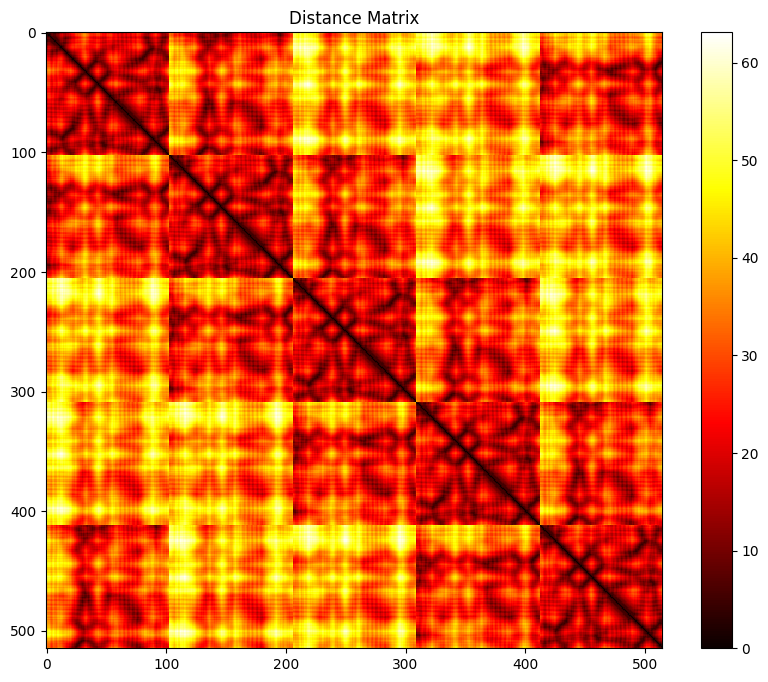

In [34]:
#plot the distance matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(dist_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Distance Matrix')
plt.show()

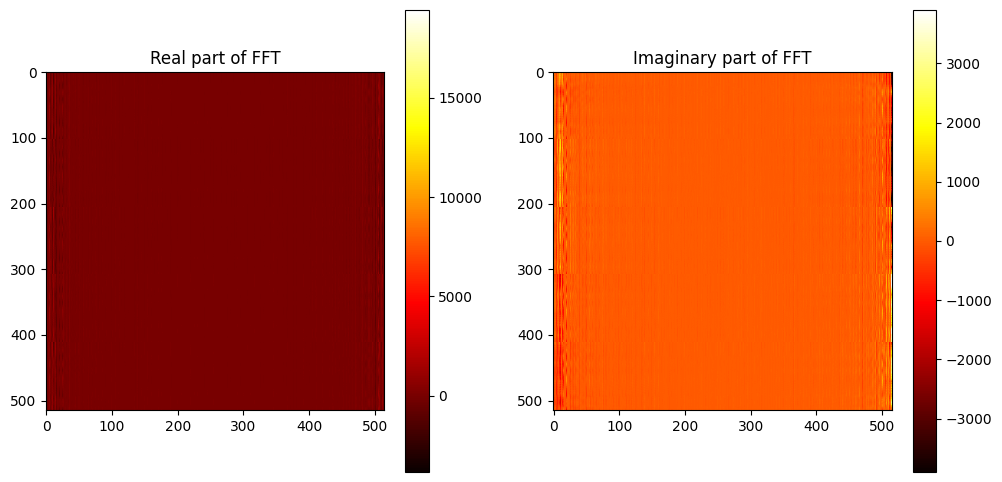

In [35]:
#plot the real and imaginary parts of the FFT
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.real(fft_matrix), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Real part of FFT')
plt.subplot(1, 2, 2)
plt.imshow(np.imag(fft_matrix), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Imaginary part of FFT')
plt.show()

Text(0.5, 0, 'Frequency')

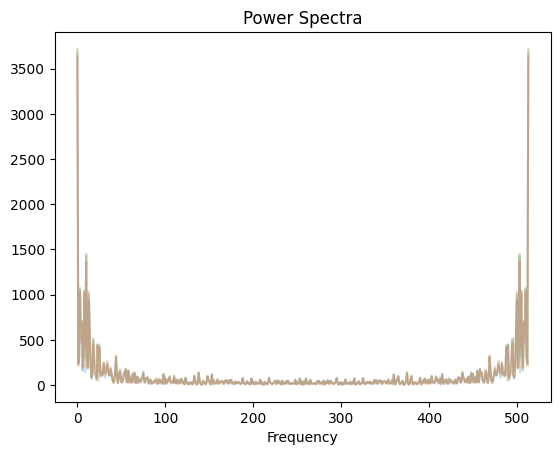

In [36]:
#plot power spectrum
for i in range(4):
	plt.plot(np.abs(fft_matrix[i][1:]), label=f'Row {i}' , alpha = .2)
plt.title('Power Spectra')
plt.xlabel('Frequency')

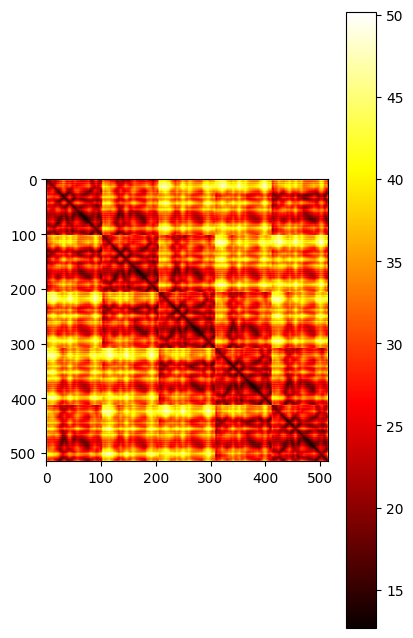

In [37]:
#low pass filter
def low_pass_filter(fft_matrix, cutoff):
	filtered_fft = np.copy(fft_matrix)
	filtered_fft[:, cutoff:] = 0
	return filtered_fft

cutoff_mat = 100
filtered_fft = low_pass_filter(fft_matrix, cutoff_mat)

#reconstruct the filtered distance matrix
reconstructed_matrix = np.fft.ifft(filtered_fft, axis=1)
reconstructed_matrix = np.real(reconstructed_matrix)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()


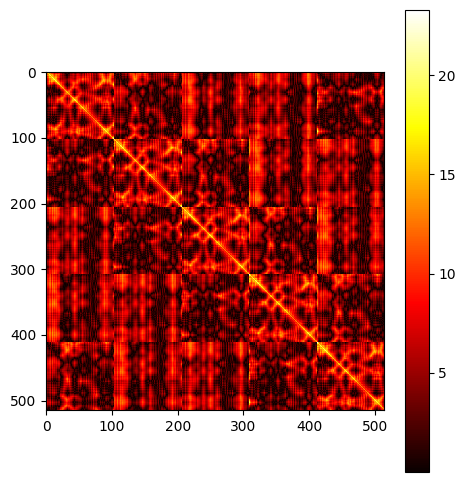

In [38]:
# plot the difference between the original and reconstructed distance matrix
#change figure size
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(np.abs(dist_matrix - reconstructed_matrix), cmap='hot', interpolation='nearest')
plt.colorbar()

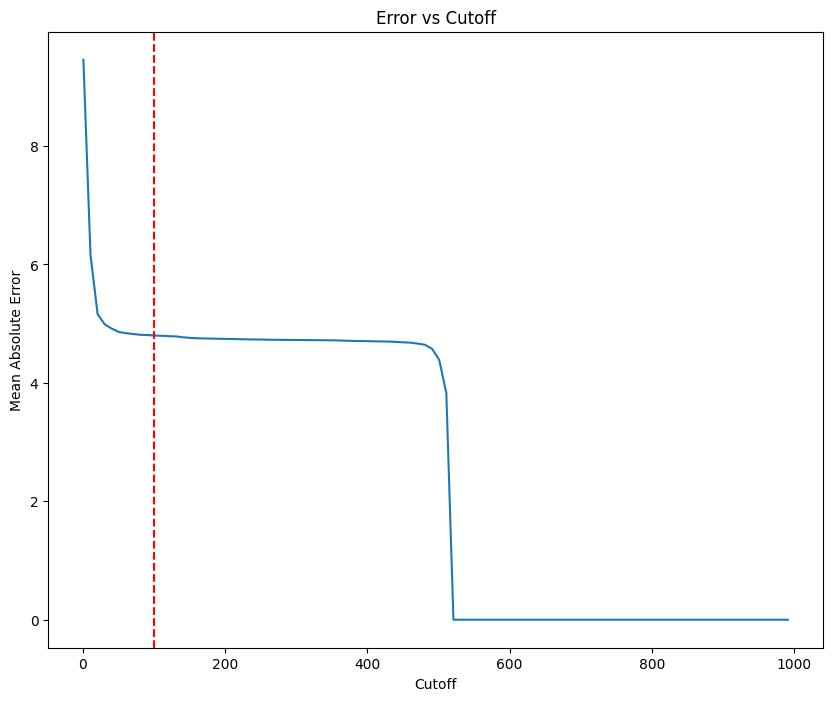

In [39]:
#plot error as a function of cutoff
cutoffs = np.arange(1, 1000, 10)
errors = []

for cutoff in cutoffs:
	filtered_fft = low_pass_filter(fft_matrix, cutoff)
	reconstructed_matrix = np.fft.ifft(filtered_fft, axis=1)
	reconstructed_matrix = np.real(reconstructed_matrix)
	error = np.mean(np.abs(dist_matrix - reconstructed_matrix))
	errors.append(error)
plt.figure(figsize=(10, 8))
plt.plot(cutoffs, errors)
plt.title('Error vs Cutoff')
plt.xlabel('Cutoff')
plt.ylabel('Mean Absolute Error')
#place a vertical line at 100 
plt.axvline(x=cutoff_mat, color='r', linestyle='--', label='Cutoff = 100')
plt.show()

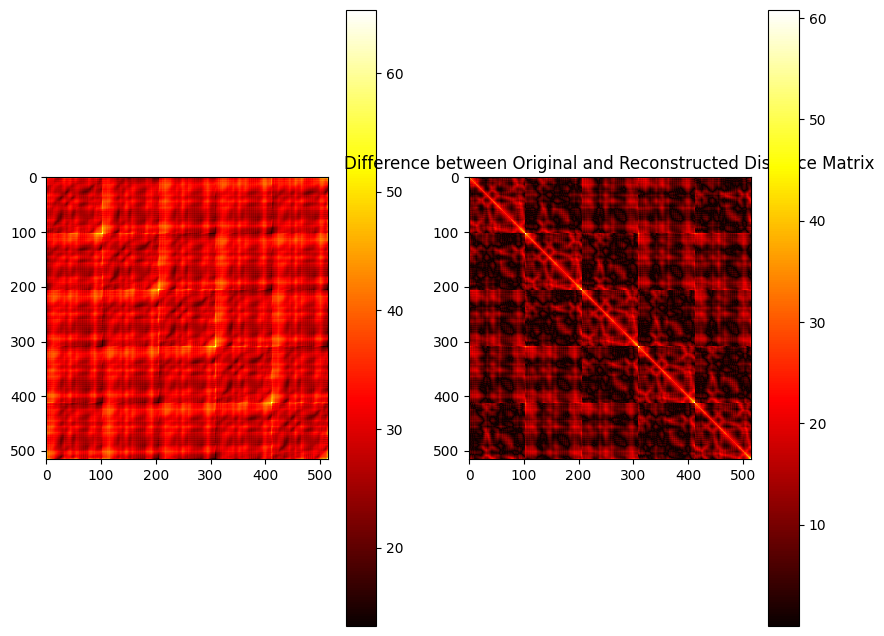

In [44]:
cutoff = 200

#low pass filter
def low_pass_filter_2d(fft_matrix, cutoff):
	filtered_fft = np.copy(fft_matrix)
	filtered_fft[cutoff:, :] = 0
	filtered_fft[:, cutoff:] = 0
	return filtered_fft
filtered_fft_2d = low_pass_filter_2d(fft_2d, cutoff)
#reconstruct the filtered distance matrix
reconstructed_matrix_2d = np.fft.ifft2(filtered_fft_2d)
reconstructed_matrix_2d = np.real(reconstructed_matrix_2d)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_matrix_2d, cmap='hot', interpolation='nearest')
plt.colorbar()
# plot the difference between the original and reconstructed distance matrix
plt.subplot(1, 2, 2)
plt.imshow(np.abs(dist_matrix - reconstructed_matrix_2d), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Difference between Original and Reconstructed Distance Matrix')
plt.show()

Text(0, 0.5, 'Mean Absolute Error')

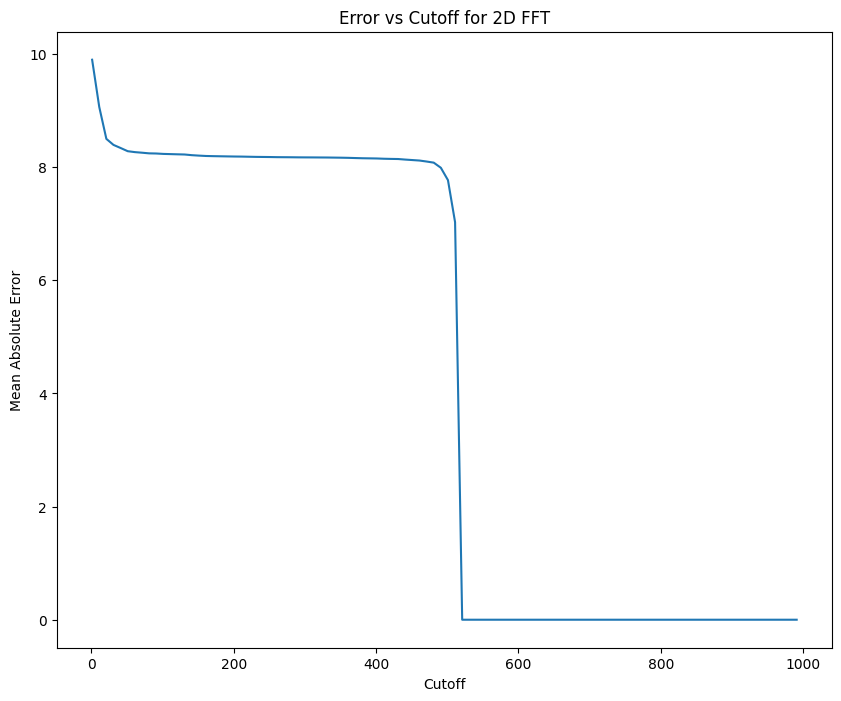

In [45]:
#plot the error as a function of cutoff
cutoffs = np.arange(1, 1000, 10)
errors = []
for cutoff in cutoffs:
	filtered_fft_2d = low_pass_filter_2d(fft_2d, cutoff)
	reconstructed_matrix_2d = np.fft.ifft2(filtered_fft_2d)
	reconstructed_matrix_2d = np.real(reconstructed_matrix_2d)
	error = np.mean(np.abs(dist_matrix - reconstructed_matrix_2d))
	errors.append(error)
plt.figure(figsize=(10, 8))
plt.plot(cutoffs, errors)
plt.title('Error vs Cutoff for 2D FFT')
plt.xlabel('Cutoff')
plt.ylabel('Mean Absolute Error')
#place a vertical line at 200